In [1]:
# 3 layers - convolution,max-pooling  ,fully connected
# 1 and 3 channels 
#addaptive momentum adam
#cross entropy loss?

#dropout layer?


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, activations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Create sample data
def create_data():
    X = np.random.randn(1000, 10)
    y = np.random.randn(1000, 1)
    return X, y

# Custom activation function
def soft_relu(x):
    return tf.math.log(1 + tf.exp(x))

# Model with custom activation function
def create_model():
    model = models.Sequential([
        layers.Dense(300, activation=soft_relu, input_shape=(10,)),
        layers.Dense(100, activation=soft_relu),
        layers.Dense(1)
    ])
    return model

# Train model and track validation loss
def train_model_with_history(model, optimizer, X_train, y_train, X_val, y_val, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss="mean_squared_error")
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1)
    return history

# Prepare data with train-test split and scaling
X, y = create_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define models with different optimizers
model_sgd = create_model()
model_adam = create_model()

# Define optimizers
optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.0001)

# Train models and record history
epochs = 50
batch_size = 32
history_sgd = train_model_with_history(model_sgd, optimizer_sgd, X_train, y_train, X_val, y_val, batch_size, epochs, 'SGD')
history_adam = train_model_with_history(model_adam, optimizer_adam, X_train, y_train, X_val, y_val, batch_size, epochs, 'ADAM')


Epoch 1/50


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.3155 - val_loss: 1.1373
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1192 - val_loss: 1.1124
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1086 - val_loss: 1.1109
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1244 - val_loss: 1.1111
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1313 - val_loss: 1.1106
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0428 - val_loss: 1.1108
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0431 - val_loss: 1.1116
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0848 - val_loss: 1.1111
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0917 - val_loss: 1.1106
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0596 - val_loss: 1.1112
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0698 - val_loss: 1.1151
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1049 - val_loss: 1.1110


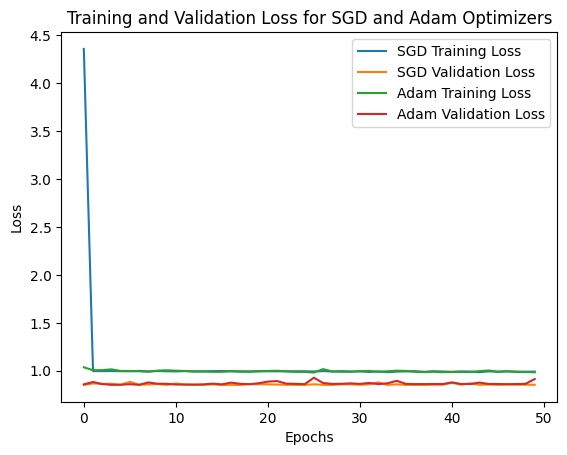

In [6]:
# Plot loss curves for both optimizers
plt.plot(history_sgd.history['loss'], label='SGD Training Loss')
plt.plot(history_sgd.history['val_loss'], label='SGD Validation Loss')
plt.plot(history_adam.history['loss'], label='Adam Training Loss')
plt.plot(history_adam.history['val_loss'], label='Adam Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for SGD and Adam Optimizers')
plt.show()